# ДЗ по "Основы языка Python для аналитиков (семинары)"
## Семинар 4.  Визуальный анализ данных
## Задача 1
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  
1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv  
1.2 Изучите стоимости недвижимости  
1.3 Изучите распределение квадратуры жилой  
1.4 Изучите распределение года постройки  

### 1.1 Считываем данные

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

Text(0, 0.5, 'Количество')

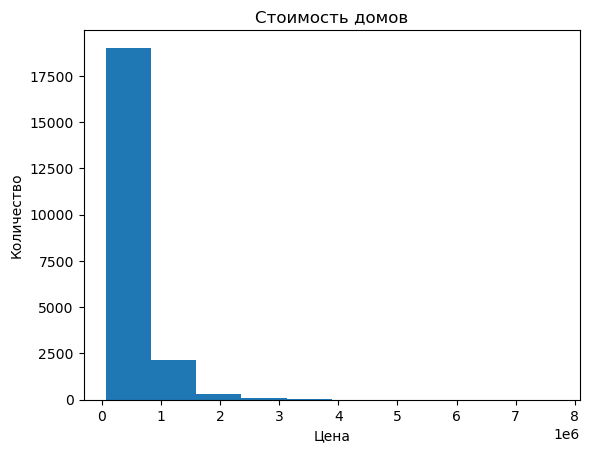

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Стоимость домов')
plt.xlabel('Цена')
plt.ylabel('Количество')

## Вывод: основная часть домов стоимостью до 1 000  000 долларов

### 1.3 Изучите распределение квадратуры жилой

Text(0, 0.5, 'Количество')

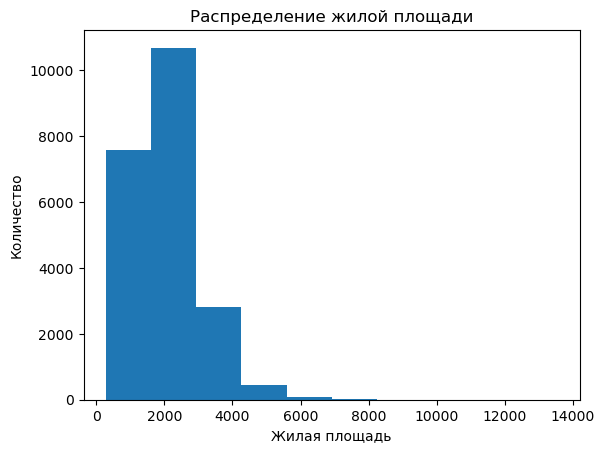

In [3]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')

## Вывод: основная часть домов до 4  000 кв.м. жилой площади.

### 1.4 Изучите распределение года постройки

Text(0, 0.5, 'Количесво')

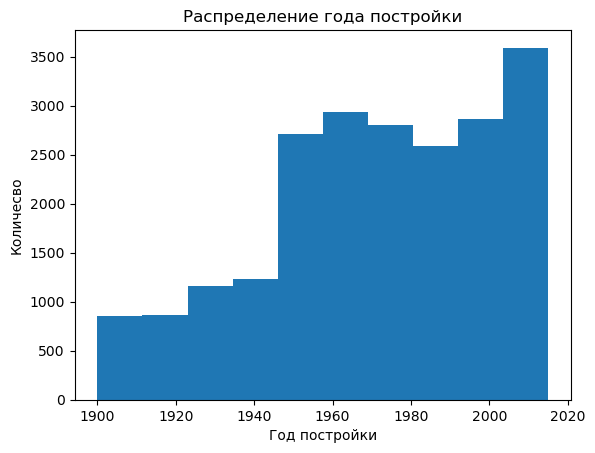

In [4]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количесво')

## Вывод: прослеживается динамика на увеличения количества возводимых домов.

## Задача 2
2.1 Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы  
2.2 Изучите распределение этажей домов  
2.3 Изучите распределение состояния домов  

### 2.1 Изучите распределение домов от наличия вида на набережную

In [5]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values
data

0    21450
1      163
Name: waterfront, dtype: int64

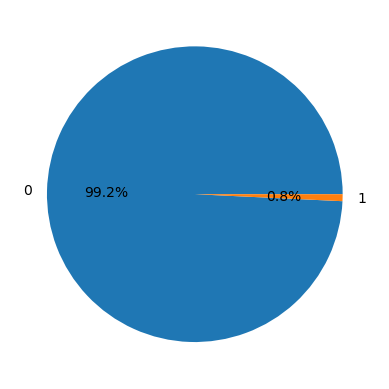

In [6]:
plt.pie(values, autopct='%.1f%%', labels=names);

## Вывод: 0.8% домов с видом на набережную. 

### 2.2 Изучите распределение этажей домов

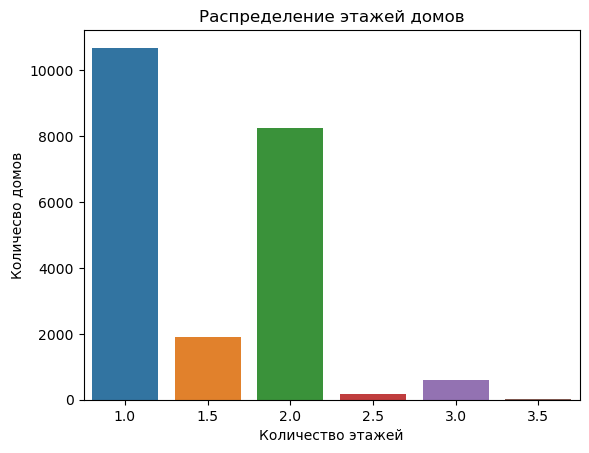

In [7]:
sns.barplot(x=df['floors'].value_counts().index, y=df['floors'].value_counts())
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количесво домов');

## Вывод: В основном одноэтажные и двухэтажные дома.

### 2.3 Изучите распределение состояния домов

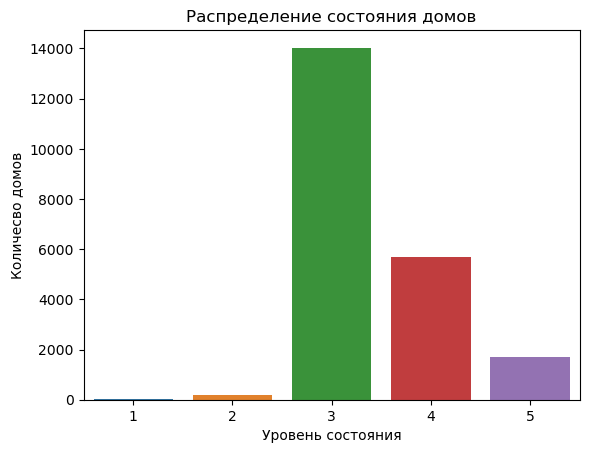

In [8]:
sns.barplot(x=df['condition'].value_counts().index, y=df['condition'].value_counts())
plt.title('Распределение состояния домов')
plt.xlabel('Уровень состояния')
plt.ylabel('Количесво домов');

## Вывод: В основном дома в среднем состоянии.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [9]:
import numpy as np
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


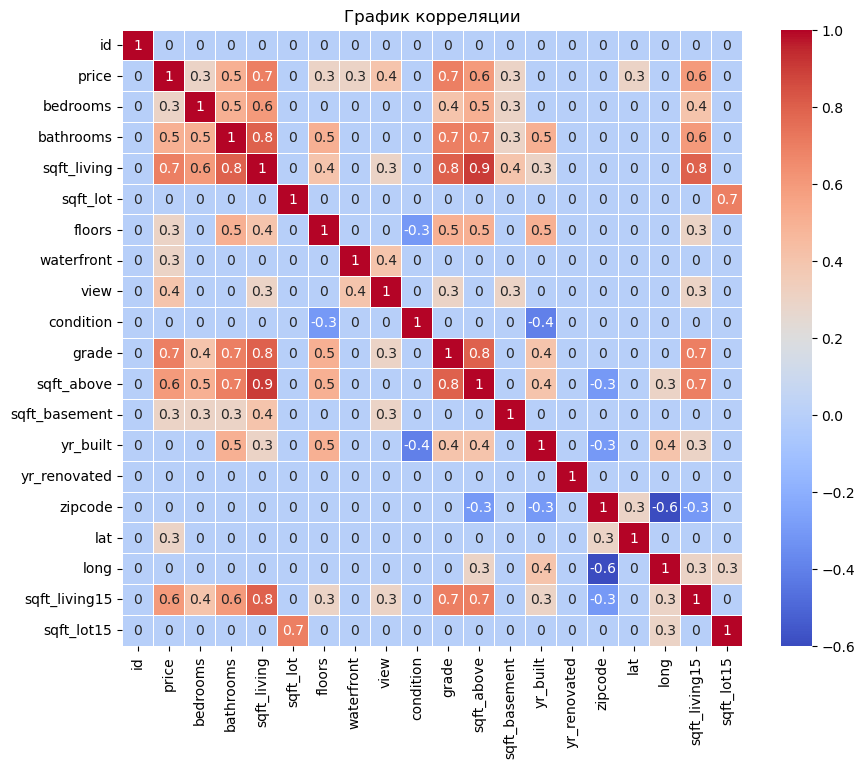

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('График корреляции');

## Вывод: график показывает величину корреляции между значениями. Например корреляция между price и sqft_living составляет 0.7 – это заметная корреляция и означает что с повышением цены дома увеличивается жилая площадь. Корреляция бывает: 0.1-0.3 слабая, 0.3-0.5 умеренная, 0.5-0.7 заметная, 0.7-0.9 высокая, 0.9-1.0 весьма высокая.



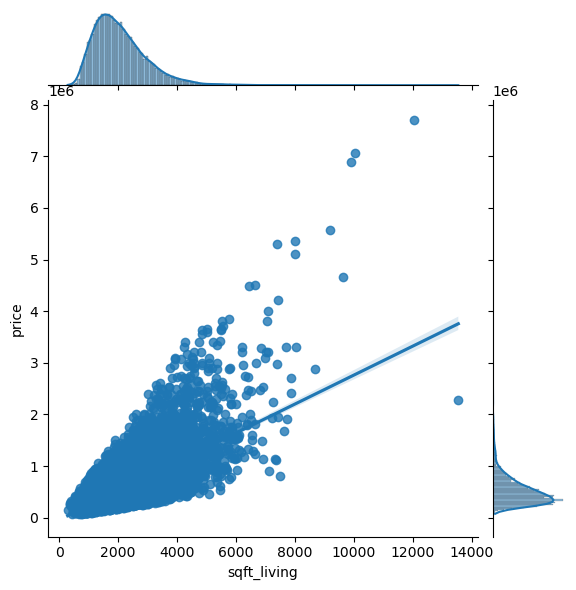

In [11]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

## Вывод: график показывает совместное распределение цены и жилых квадратных метров, то есть визуально можно увидеть зависимость, как увеличивается цена дома с увеличением жилых метров.

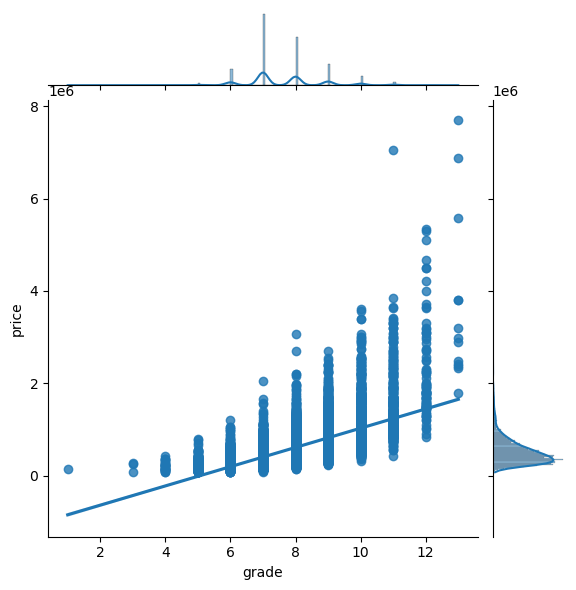

In [12]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

## Вывод: график показывает совместное распределение цены и качества дома, то есть визуально можно увидеть, как зависит цена от качества дома. С увеличением качества дома, цена увеличивается, но есть дома с хорошим и плохим качеством, примерно с одинаковой стоимостью.

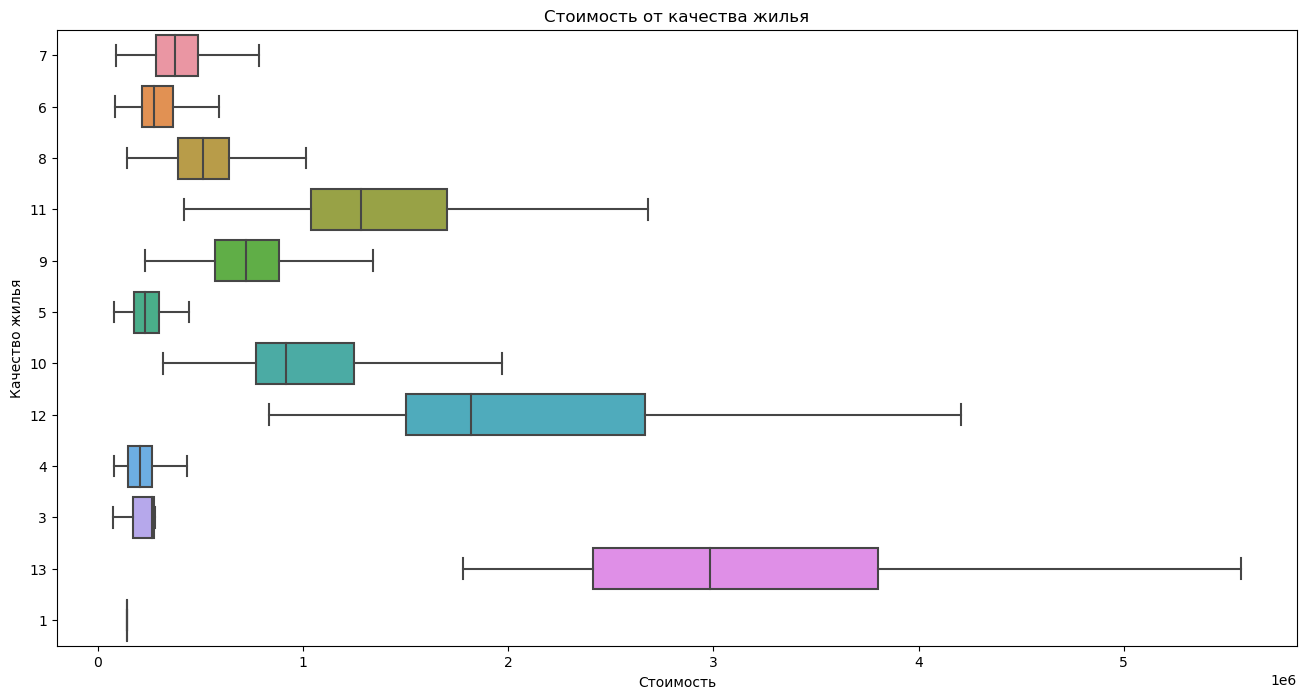

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), showfliers=False)
plt.xlabel('Стоимость')
plt.ylabel('Качество жилья')
plt.title('Стоимость от качества жилья');

## Вывод: на данной диаграмме можно увидеть ящики с усами, какой ценовой диапазон у домов, медиана, максимальная и минимальная цена в зависимости от качества жилья. Выбросы отфильтровываются.

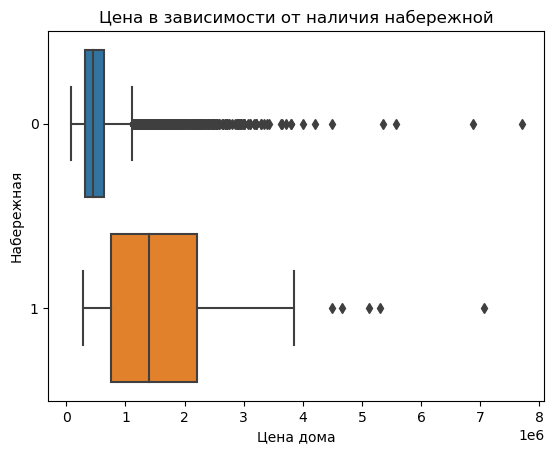

In [14]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5)
plt.xlabel('Цена дома')
plt.ylabel('Набережная')
plt.title('Цена в зависимости от наличия набережной');

## Вывод: дома где набережная есть стоят дороже и ценовой диапазон у этих домов шире.

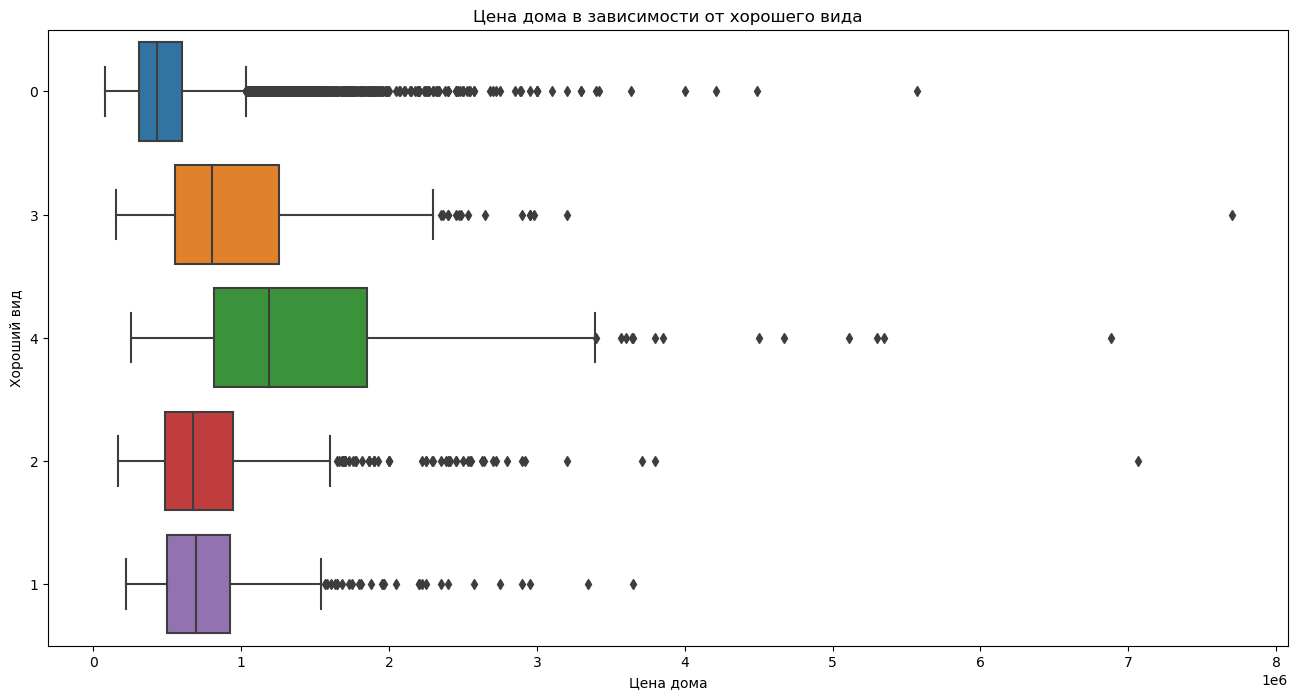

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)
plt.xlabel('Цена дома')
plt.ylabel('Хороший вид')
plt.title('Цена дома в зависимости от хорошего вида');

## Вывод: цена дома выше, если вид очень хороший, а так отличается не очень сильно.